# 0. 라이브러리 설치 및 준비

In [1]:
# %pip install pycaret
# %pip install holidayskr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import platform

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumBarunGothic'
    plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 가져오기 & merge

In [3]:
import pandas as pd

sales = pd.read_csv('data/Sales_data.csv', encoding='utf-8-sig', index_col=0)
member = pd.read_csv('data/Member_data.csv', encoding='utf-8-sig')

sales.info() # (199999, 10)
member.info() # (81360, 8)

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199999 non-null  object 
 1   배송완료일   199999 non-null  object 
 2   배송시작일   199999 non-null  object 
 3   구매일     199999 non-null  object 
 4   구매시월령   168142 non-null  float64
 5   고객번호    199999 non-null  object 
 6   구매금액    199999 non-null  int64  
 7   결제금액    199999 non-null  int64  
 8   물품대분류   199999 non-null  object 
 9   상품명     199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 16.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81360 entries, 0 to 81359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    81360 non-null  object 
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등

/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/3608844207.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('data/Sales_data.csv', encoding='utf-8-sig', index_col=0)
/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/3608844207.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  member = pd.read_csv('data/Member_data.csv', encoding='utf-8-sig')


In [4]:
sales.isnull().sum() # 그대로

주문번호         0
배송완료일        0
배송시작일        0
구매일          0
구매시월령    31857
고객번호         0
구매금액         0
결제금액         0
물품대분류        0
상품명          0
dtype: int64

In [5]:
sales['고객번호'] = pd.to_numeric(sales['고객번호'], errors='coerce')

In [6]:
member = member.dropna()
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    81094 non-null  object 
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.6+ MB


In [7]:
member['고객번호'] = pd.to_numeric(member['고객번호'], errors='coerce')

In [8]:
sales.info(), member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199999 non-null  object 
 1   배송완료일   199999 non-null  object 
 2   배송시작일   199999 non-null  object 
 3   구매일     199999 non-null  object 
 4   구매시월령   168142 non-null  float64
 5   고객번호    199999 non-null  float64
 6   구매금액    199999 non-null  int64  
 7   결제금액    199999 non-null  int64  
 8   물품대분류   199999 non-null  object 
 9   상품명     199999 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 16.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    81094 non-null  int64  
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  

(None, None)

In [9]:
member['결제등록카드'] = member['결제등록카드'].replace('국민카드', '국민은행').replace('신한카드', '신한은행').replace('외환은행', '하나은행')

In [10]:
member['결제등록카드'].unique()
# member['결제등록카드'].nunique() # 21개

array(['국민은행', '하나은행', '기업은행', '신한은행', '광주은행', 'BC카드', '우리은행', '농협회원조합',
       '신협중앙회', '롯데카드', '대구은행', '농협중앙회', '새마을금고', '우체국', 'SC제일은행', '현대카드',
       '삼성카드', '부산은행', '씨티은행', '미래에셋증권', '경남은행'], dtype=object)

In [11]:
df = pd.merge(sales, member, on='고객번호', how='inner')

/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/1438321430.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(sales, member, on='고객번호', how='inner')


In [12]:
# df.to_csv('merge_sales_member.csv', index=False)
# result = pd.read_csv('merge_sales_member.csv')
# result.info() # (199583, 17)

# 2. merge 이후 데이터 양상 확인

In [13]:
# df.info() # (199583, 17)

## 0 고객번호

In [14]:
df['고객번호'].nunique() # 266명 감소 (member 전처리 dropna 결과)

81094

## 1 성별

In [15]:
df['성별'].unique()

array(['여', '남'], dtype=object)

## 2 결혼유무

In [16]:
df['결혼유무'].unique()

array(['기혼', '미혼'], dtype=object)

## 3 거주지역

In [17]:
df['거주지역'].unique()
# df['거주지역'].nunique() # 15개

array(['서울', '충북', '강원', '제주', '인천', '대구', '경기', '부산', '경남', '광주', '경북',
       '전북', '충남', '대전', '전남'], dtype=object)

In [18]:
df['거주지역'] = df['거주지역'].replace({'강원':'강원','경기':'경기','경남':'경상도','경북':'경상도','광주':'광주'
                  ,'대구':'대구','대전':'대전','부산':'부산','서울':'서울','인천':'인천'
                   ,'전남':'전라도','전북':'전라도','제주':'제주','충남':'충청도','충북':'충청도'
                })

In [19]:
df['거주지역'].unique()
# df['거주지역'].nunique() # 12

array(['서울', '충청도', '강원', '제주', '인천', '대구', '경기', '부산', '경상도', '광주',
       '전라도', '대전'], dtype=object)

## 4 연령

In [20]:
df['연령'] = df['연령'].astype('int64') # float -> int로 변경
df['연령'].unique()
# df['연령'].nunique() # 27개

array([30, 28, 31, 35, 32, 34, 29, 36, 33, 37, 38, 39, 27, 25, 40, 26, 41,
       22, 24, 42, 44, 43, 23, 45, 46, 21, 20])

## 5 결제등록카드

In [21]:
df['결제등록카드'].unique()
# df['결제등록카드'].nunique() # 21개

array(['롯데카드', '광주은행', '신협중앙회', '신한은행', '하나은행', '국민은행', '농협중앙회', '우리은행',
       '농협회원조합', '새마을금고', 'BC카드', '현대카드', '기업은행', '대구은행', 'SC제일은행',
       '삼성카드', '부산은행', '우체국', '미래에셋증권', '경남은행', '씨티은행'], dtype=object)

## 6 유입경로

In [22]:
df['유입경로'].unique()
# df['유입경로'].nunique() # 10개

array(['인스타그램', '검색광고', '네이버블로그', '지인추천', '페이스북', '네이버카페', '오픈마켓', '직접검색',
       '매장쿠폰', '이마트'], dtype=object)

## 7 자녀여부

In [23]:
df['자녀여부'].unique()

array(['Yes', 'No'], dtype=object)

## 8 주문번호

In [24]:
df['주문번호'].unique() # object형 그대로

array([901011864201303, 901011864430366, 81231186197954, ...,
       '00806172918-0266350223939', '00806204436-0461904922687',
       '00806204436-0461904922688'], dtype=object)

## 9 배송완료일

In [25]:
df['배송완료일'] = pd.to_datetime(df['배송완료일'])

## 10 배송시작일

In [26]:
df['배송시작일'] = pd.to_datetime(df['배송시작일'])

## 11 구매일

In [27]:
df['구매일'] = pd.to_datetime(df['구매일'])

## 12 구매시월령

In [28]:
df['구매시월령'].isnull().sum() # 31743개 => 추후에 Nan 고객 특성 더 살펴보기

31743

In [29]:
df_구매시월령 = df[df['구매시월령'] < 0] # 음수값
len(df_구매시월령) # 14568개

14568

### (파생변수 생성) 출산예정 컬럼

In [30]:
df['출산예정'] = (df['구매시월령'] < 0).astype(int)
df['출산예정'].value_counts()

출산예정
0    185015
1     14568
Name: count, dtype: int64

In [31]:
len(df['구매시월령'] >= 0)

199583

In [32]:
df[df['구매시월령'] >= 0]['구매시월령'].describe()

count    153272.000000
mean         16.540197
std          39.906962
min           0.000000
25%           3.000000
50%           7.000000
75%          14.000000
max        1439.000000
Name: 구매시월령, dtype: float64

In [33]:
df2 = df[df['구매시월령'] >= 0]['구매시월령']

In [34]:
# Q1 = df2.quantile(0.25)
# Q3 = df2.quantile(0.75)
# IQR = Q3 - Q1

# print(f"Q1 (1사분위수): {Q1:.2f}")
# print(f"Q3 (3사분위수): {Q3:.2f}")
# print(f"IQR (Q3 - Q1): {IQR:.2f}")
# print(f"이상치 하한선 (Q1 - 1.5*IQR): {Q1 - 1.5 * IQR:.2f}")
# print(f"이상치 상한선 (Q3 + 1.5*IQR): {Q3 + 1.5 * IQR:.2f}")

# plt.figure(figsize=(8, 6)) # 그래프 크기 설정
# sns.boxplot(y=df2) # 'y'축에 df2 Series 사용
# plt.title('구매시월령 (0개월 이상) 분포 상자 그림', fontsize=16) # 그래프 제목
# plt.ylabel('구매시월령 (개월)', fontsize=13) # y축 라벨
# plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
# plt.show()

In [35]:
# # 1. Q1, 중앙값 (Median), Q3, IQR 계산
# Q1 = df2.quantile(0.25)
# Median = df2.quantile(0.50)
# Q3 = df2.quantile(0.75)
# IQR = Q3 - Q1

# print(f"--- 'df2' (구매시월령 0개월 이상) IQR 및 분위수 정보 ---")
# print(f"Q1 (1사분위수): {Q1:.2f}")
# print(f"중앙값 (Median): {Median:.2f}")
# print(f"Q3 (3사분위수): {Q3:.2f}")
# print(f"IQR (Q3 - Q1): {IQR:.2f}")
# print(f"이상치 하한선 (Q1 - 1.5*IQR): {Q1 - 1.5 * IQR:.2f}")
# print(f"이상치 상한선 (Q3 + 1.5*IQR): {Q3 + 1.5 * IQR:.2f}")


# # 2. 히스토그램과 KDE 곡선 그리기
# plt.figure(figsize=(12, 7)) # 그래프 크기 설정

# # histplot으로 히스토그램과 KDE 곡선 그리기
# sns.histplot(x=df2, bins=50, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# # 3. Q1, 중앙값, Q3 위치에 수직선 그리기
# plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
# plt.axvline(Median, color='red', linestyle='-', linewidth=2, label=f'중앙값: {Median:.2f}')
# plt.axvline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# # 4. IQR 구간 (Q1에서 Q3까지)을 음영으로 표시
# plt.axvspan(Q1, Q3, color='gray', alpha=0.2, label=f'IQR 영역 ({IQR:.2f})')

# # 5. 그래프 제목 및 축 라벨 설정
# plt.title('구매시월령 분포 (히스토그램 & KDE) 및 IQR 표시', fontsize=18)
# plt.xlabel('구매시월령 (개월)', fontsize=14)
# plt.ylabel('빈도수', fontsize=14)

# # x축 라벨을 실제 숫자로 표시하도록 포맷터 설정
# formatter = ticker.ScalarFormatter(useOffset=False) # 과학적 표기법 사용 안함
# formatter.set_scientific(False) # 과학적 표기법 끄기
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.ticklabel_format(style='plain', axis='x') # x축 과학적 표기법 방지

# plt.legend(fontsize=12) # 범례 표시
# plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
# plt.show()

In [36]:
# # 1. Q1, Q3, IQR 계산
# # df2 (Series) 대신 원본 df['구매시월령']을 기준으로 하되, NaN과 음수는 제외하고 계산
# Q1 = df[df['구매시월령'] >= 0]['구매시월령'].quantile(0.25)
# Q3 = df[df['구매시월령'] >= 0]['구매시월령'].quantile(0.75)
# IQR = Q3 - Q1

# # 2. 이상치 경계선 계산
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# print(f"기준: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
# print(f"이상치 하한선: {lower_bound:.2f}, 이상치 상한선: {upper_bound:.2f}")

# # 3. 이상치 데이터프레임 필터링
# # '구매시월령'이 0 이상이면서, 이상치 하한보다 작거나 이상치 상한보다 큰 행들을 선택합니다.
# outliers_df = df[
#     (df['구매시월령'] >= 0) & # 0개월 이상인 유효한 데이터 중에서
#     ((df['구매시월령'] < lower_bound) | (df['구매시월령'] > upper_bound)) # 이상치 조건에 해당하는 경우
# ].copy() # SettingWithCopyWarning 방지를 위해 .copy() 사용

# print(f"\n{len(outliers_df)}개의 이상치 행 발견")

In [37]:
# 구매시월령 상한선 정해야해요
# 240 -> 20살 ~ 898개
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 13 구매금액

In [38]:
df['구매금액'].describe()

count    199583.000000
mean      30570.144401
std       30555.274398
min           0.000000
25%        7400.000000
50%       17500.000000
75%       51200.000000
max      598000.000000
Name: 구매금액, dtype: float64

In [39]:
df = df[df['결제금액']>=0] # 음수값 인스턴스 1행 제거

## 14 결제금액

In [40]:
df['결제금액'].describe()

count    199582.000000
mean      21712.598080
std       21337.720041
min           0.000000
25%        6000.000000
50%       12602.000000
75%       34799.000000
max      539000.000000
Name: 결제금액, dtype: float64

## 15 물품대분류

In [41]:
df['물품대분류'].unique()
# df['물품대분류'].nunique() # 10개

array(['팬티', '체험팩', '더블하트', 'SKC', 'FMC', '물티슈', '기저귀', 'FC', '기타', 'SrC'],
      dtype=object)

### 물티슈
8846 -> 9525

In [42]:
df[df['물품대분류'] == '물티슈'].shape[0] # 8446

8446

In [43]:
mask = df['상품명'].str.contains('물티슈', na=False)
df.loc[mask, '물품대분류'] = '물티슈'

In [44]:
df[df['물품대분류'] == '물티슈'].shape[0] # 9525

9525

### 기타
7820 -> 45056

In [45]:
df[df['물품대분류'] == '기타'].shape[0] # 7820

7820

In [46]:
mask = df['상품명'].str.contains('더블하트', na=False)
df.loc[mask, '물품대분류'] = '기타'

In [47]:
df[df['물품대분류'] == '기타'].shape[0] # 45002

45002

In [48]:
mask = df['상품명'].str.contains('핑크퐁', na=False)
df.loc[mask, '물품대분류'] = '기타'

In [49]:
df[df['물품대분류'] == '기타'].shape[0] # 45037

45037

In [50]:
mask = df['상품명'].str.contains('젖병 깔끔 세척 끝! 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'

In [51]:
df[df['물품대분류'] == '기타'].shape[0] # 45053

45053

In [52]:
mask = df['상품명'].str.contains('이유식기 준비 끝! 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'

In [53]:
df[df['물품대분류'] == '기타'].shape[0] # 45055

45055

In [54]:
mask = df['상품명'].str.contains('안심 위생 관리 세트', na=False)
df.loc[mask, '물품대분류'] = '기타'

In [55]:
df[df['물품대분류'] == '기타'].shape[0] # 45056

45056

### SKC
8674 -> 8689

In [56]:
df[df['물품대분류'] == 'SKC'].shape[0] # 8674

8674

In [57]:
mask = df['상품명'].str.contains('레드투래드', na=False)
df.loc[mask, '물품대분류'] = 'SKC'

In [58]:
df[df['물품대분류'] == 'SKC'].shape[0] # 8689

8689

## 16 상품명

In [59]:
df['상품명'].nunique() # 2975개

2975

## check - 15. 더블하트

In [60]:
df['물품대분류'].unique()

array(['팬티', '체험팩', '기타', 'SKC', 'FMC', '물티슈', '기저귀', 'FC', '더블하트', 'SrC'],
      dtype=object)

In [61]:
len(df[df['물품대분류']=='더블하트'])

22

In [62]:
# df[df['물품대분류'] == '더블하트'].head(22)

# 3. 전처리, EDA

## 1) (파생변수 생성) 배송소요일(배송시작일~배송완료일)
평균 배송소요일: 2.7304115601607357

In [63]:
# df.info() # (199582, 18)

In [64]:
df['배송소요일'] = (df['배송완료일'] - df['배송시작일']).dt.days
df['배송소요일'].describe()

count    199582.000000
mean          2.730412
std           0.902544
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: 배송소요일, dtype: float64

In [65]:
df['배송소요일'].mean()

2.7304115601607357

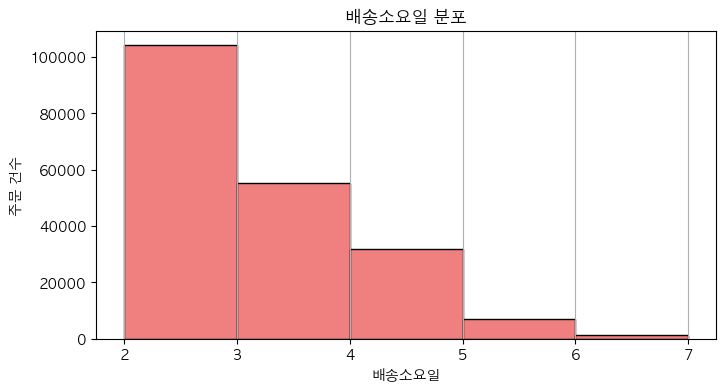

In [66]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumBarunGothic'
    plt.rcParams['axes.unicode_minus'] = False
    
plt.figure(figsize=(8, 4))
df['배송소요일'].hist(bins=range(df['배송소요일'].min(), df['배송소요일'].max()+2), color='lightcoral', edgecolor='black')
plt.title('배송소요일 분포')
plt.xlabel('배송소요일')
plt.ylabel('주문 건수')
plt.grid(axis='y')
plt.show()

배송소요일(배송시작일~배송완료일)
- 최소 2일 ~ 최장 6일
- 평균 2.73일 내로 배송됨

## 2) 주문처리소요일(구매일~배송시작일)
파생변수 의미가 없어서 삭제함

In [67]:
# df.info() # (199582, 19)

In [68]:
df['주문처리소요일'] = (df['배송시작일'] - df['구매일']).dt.days
df['주문처리소요일'].describe()

count    199582.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: 주문처리소요일, dtype: float64

In [69]:
df = df.drop(['주문처리소요일'], axis=1)

- 모두 1일내로 주문처리됨

## 3) 총구매소요일(구매일~배송완료일)

In [70]:
df['총구매소요일'] = (df['배송완료일'] - df['구매일']).dt.days
df['총구매소요일'].describe()

count    199582.000000
mean          3.730412
std           0.902544
min           3.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: 총구매소요일, dtype: float64

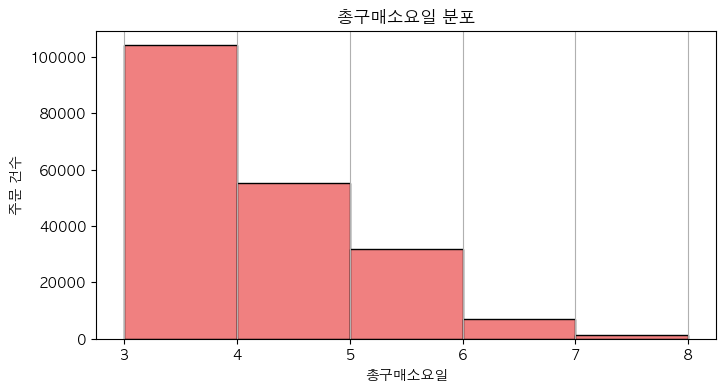

In [71]:
plt.figure(figsize=(8, 4))
df['총구매소요일'].hist(bins=range(df['총구매소요일'].min(), df['총구매소요일'].max()+2), color='lightcoral', edgecolor='black')
plt.title('총구매소요일 분포')
plt.xlabel('총구매소요일')
plt.ylabel('주문 건수')
plt.grid(axis='y')
plt.show()

## 지연주문탐지 개념정립

지연 주문 기준 설정
- 평균 배송일: 2.73일
- 표준편차: 0.9일
- 최대배송일: 6일

평균 배송일 + 표준편차 = 2.73+0.9 ≈ 3.63일

4일 이상 소요된 주문을 **지연주문**으로 정의

df
- 고객번호, 성별, 결혼유무, 거주지역, 연령, 결제등록카드, 유입경로, 자녀여부, 주문번호, 배송완료일, 배송시작일, 구매일, 구매시월령, 고객번호, 구매금액, 결제금액, 물품대분류, 상품명, 출산예정 + 파생변수

## 3) 지연주문건수 확인 (배송소요일로)

In [72]:
df.info() # (199582, 19)

<class 'pandas.core.frame.DataFrame'>
Index: 199582 entries, 0 to 199582
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   주문번호    199582 non-null  object        
 1   배송완료일   199582 non-null  datetime64[ns]
 2   배송시작일   199582 non-null  datetime64[ns]
 3   구매일     199582 non-null  datetime64[ns]
 4   구매시월령   167839 non-null  float64       
 5   고객번호    199582 non-null  float64       
 6   구매금액    199582 non-null  int64         
 7   결제금액    199582 non-null  int64         
 8   물품대분류   199582 non-null  object        
 9   상품명     199582 non-null  object        
 10  성별      199582 non-null  object        
 11  결혼유무    199582 non-null  object        
 12  거주지역    199582 non-null  object        
 13  연령      199582 non-null  int64         
 14  결제등록카드  199582 non-null  object        
 15  유입경로    199582 non-null  object        
 16  자녀여부    199582 non-null  object        
 17  출산예정    199582 non-null  int64    

In [73]:
df['지연배송'] = (df['배송소요일'] >= 4).astype(int)
delayed=df[df['지연배송']==1]
print(f"지연 배송: {len(delayed)}건") # 40312건

지연 배송: 40312건


In [74]:
delayed_ratio = (delayed.shape[0] / df.shape[0]) * 100
delayed_ratio = round(delayed_ratio, 1)
print(f"지연 배송건 비율: {delayed_ratio}%")

지연 배송건 비율: 20.2%


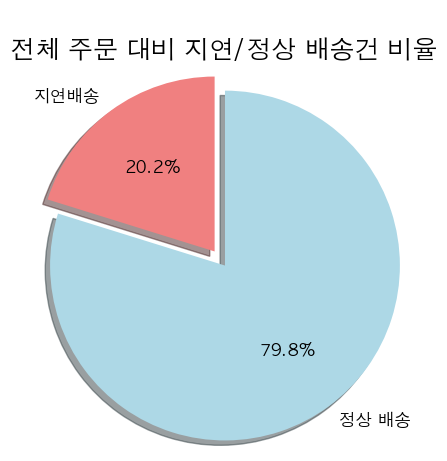


총 주문 건수: 199582건
지연배송 건수: 40312건
정상배송 건수: 159270건
지연배송 비율: 20.2%



In [75]:
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumBarunGothic'
    plt.rcParams['axes.unicode_minus'] = False
    
delayed_orders = delayed.shape[0] # 지연 배송건 갯수
total_orders = df.shape[0] # 전체 주문 수
ontime_orders = total_orders - delayed_orders # 정상 배송건 갯수

labels = ['지연배송', '정상 배송']
sizes = [delayed_orders, ontime_orders]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(5, 5))

plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12, 'color': 'black', 'fontweight': 'bold'})

plt.axis('equal')

plt.title('\n전체 주문 대비 지연/정상 배송건 비율', fontsize=18, fontweight='bold')
plt.show()

print(f"\n총 주문 건수: {total_orders}건")
print(f"지연배송 건수: {delayed_orders}건")
print(f"정상배송 건수: {ontime_orders}건")
print(f"지연배송 비율: {(delayed_orders / total_orders) * 100:.1f}%\n")

## 4) 지역별 배송 분석

In [76]:
# df.info() # (199582, 21)

In [77]:
# 지역별 평균배송소요일(배송시작일~배송완료일)
region_avg_delivery_days = df.groupby('거주지역')['배송소요일'].mean().reset_index()
region_avg_delivery_days.columns = ['거주지역', '배송소요일']
# region_avg_delivery_days

In [78]:
# 지역별 지연배송비율(기준: 배송소요일 4일 이상)
region_delay_ratio = df.groupby('거주지역')['지연배송'].mean() * 100
region_delay_ratio = region_delay_ratio.reset_index()
region_delay_ratio.columns = ['거주지역', '지연배송비율(%)']
# region_delay_ratio

In [79]:
# 지역별 평균총구매소요일(구매일~배송완료일)
region_avg_total_delivery_days = df.groupby('거주지역')['총구매소요일'].mean().reset_index()
region_avg_total_delivery_days.columns = ['거주지역', '총구매소요일']
# region_avg_total_delivery_days

In [80]:
# 두 지표를 하나의 데이터프레임으로 병합
df_region = pd.merge(region_avg_delivery_days, region_delay_ratio, on='거주지역')
df_region['전국평균대비(%p)'] = df_region['지연배송비율(%)'] - delayed_ratio

# 지연배송비율 내림차순 정렬
df_region.sort_values(by='지연배송비율(%)', ascending=False).reset_index(drop=True)

,거주지역,배송소요일,지연배송비율(%),전국평균대비(%p)
0,대구,2.741308,20.672714,0.472714
1,인천,2.740146,20.576264,0.376264
2,제주,2.734748,20.462296,0.262296
3,강원,2.734028,20.452516,0.252516
4,경기,2.733590,20.426045,0.226045
5,경상도,2.735933,20.292424,0.092424
6,서울,2.726737,20.269426,0.069426
7,광주,2.728292,20.228196,0.028196
8,충청도,2.727666,20.032203,-0.167797
9,전라도,2.723048,20.009294,-0.190706


## 5) 공휴일 라이브러리 적용하여 분석

### 평일/휴일 처리

In [81]:
# df.info() # (199582, 21)

In [82]:
from holidayskr import year_holidays

In [83]:
holidays = []

for year in [2021,2022,2023]:
    holidays += [d for d, _ in year_holidays(year)]

In [84]:
# 공휴일
df['공휴일'] = df['구매일'].dt.date.isin(holidays).astype(int) # (공휴일:1)

In [85]:
# 요일 번호 추출 (0~6)
df['요일번호'] = df['구매일'].dt.weekday # (일요일:6)

In [86]:
# 휴일 컬럼
df['휴일'] = (df['공휴일'] | (df['요일번호'] == 6)).astype(int) # (휴일:1 / 평일:0)

In [87]:
df.head()

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,...,결제등록카드,유입경로,자녀여부,출산예정,배송소요일,총구매소요일,지연배송,공휴일,요일번호,휴일
0,901011864201303,2022-01-06,2022-01-02,2022-01-01,35.0,2.019010e+14,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),...,롯데카드,인스타그램,Yes,0,4,5,1,1,5,1
1,901011864430366,2022-01-04,2022-01-02,2022-01-01,9.0,2.019010e+14,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),...,광주은행,인스타그램,Yes,0,2,3,0,1,5,1
2,81231186197954,2022-01-06,2022-01-02,2022-01-01,22.0,2.018123e+14,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),...,신협중앙회,인스타그램,No,0,4,5,1,1,5,1
3,90403223538555,2022-04-07,2022-04-04,2022-04-03,25.0,2.018123e+14,74560,45618,팬티,하기스 매직핏팬티 5단계 여아 124매(팬티형),...,신협중앙회,인스타그램,No,0,3,4,0,0,6,1
4,90501232847856,2022-05-04,2022-05-02,2022-05-01,26.0,2.018123e+14,67700,45974,팬티,하기스 매직팬티 컴포트핏 5단계 여아 120매(팬티형),...,신협중앙회,인스타그램,No,0,2,3,0,1,6,1


### 분석

In [88]:
# df.info() # (199582, 24)

In [89]:
df = df.drop(columns=['공휴일', '요일번호']) # 제거
df.info() # (199582, 22)

<class 'pandas.core.frame.DataFrame'>
Index: 199582 entries, 0 to 199582
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   주문번호    199582 non-null  object        
 1   배송완료일   199582 non-null  datetime64[ns]
 2   배송시작일   199582 non-null  datetime64[ns]
 3   구매일     199582 non-null  datetime64[ns]
 4   구매시월령   167839 non-null  float64       
 5   고객번호    199582 non-null  float64       
 6   구매금액    199582 non-null  int64         
 7   결제금액    199582 non-null  int64         
 8   물품대분류   199582 non-null  object        
 9   상품명     199582 non-null  object        
 10  성별      199582 non-null  object        
 11  결혼유무    199582 non-null  object        
 12  거주지역    199582 non-null  object        
 13  연령      199582 non-null  int64         
 14  결제등록카드  199582 non-null  object        
 15  유입경로    199582 non-null  object        
 16  자녀여부    199582 non-null  object        
 17  출산예정    199582 non-null  int64    

In [90]:
# 원본 데이터
origin_stats = {
    '배송소요일': df['배송소요일'].mean(),
    '총구매소요일': df['총구매소요일'].mean(),
    '지연배송비율': df['지연배송'].mean() * 100
}
origin_df = pd.DataFrame([origin_stats])
origin_df

,배송소요일,총구매소요일,지연배송비율
0,2.730412,3.730412,20.198214


In [91]:
# 2) 평일/휴일 분리해서 확인
holiday_df = df.groupby('휴일').agg(
    배송소요일 = ('배송소요일', 'mean'),
    총구매소요일 = ('총구매소요일', 'mean'),
    지연배송비율 = ('지연배송', 'mean')
).reset_index()

holiday_df['지연배송비율'] = holiday_df['지연배송비율'] * 100
holiday_df

,휴일,배송소요일,총구매소요일,지연배송비율
0,0,2.731309,3.731309,20.199306
1,1,2.726648,3.726648,20.193634


/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/588863378.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='휴일', y='배송소요일', palette='Blues', inner='box')
/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/588863378.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='휴일', y='총구매소요일', palette='Greens', inner='box')
/var/folders/pq/rr2mljs579zdggc598s4fmx00000gn/T/ipykernel_66211/588863378.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='휴일', y='지연배송', palette='

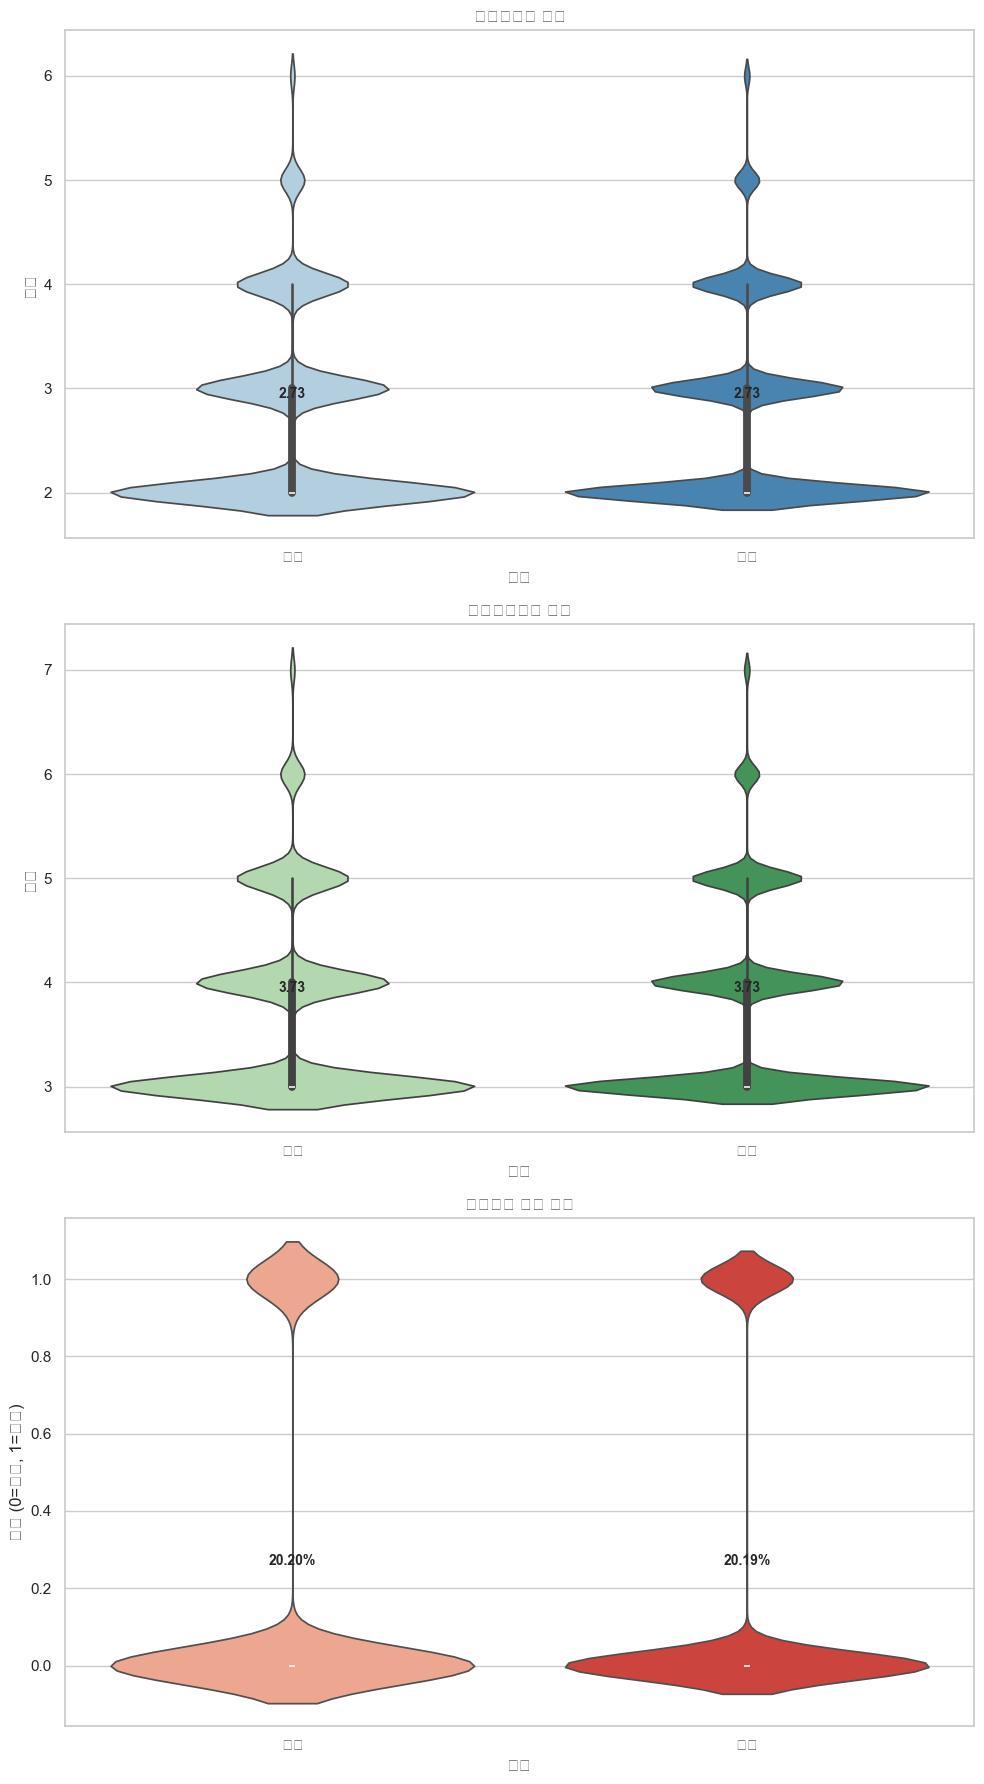

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# 폰트 설정 (운영체제에 따라 자동 적용)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 휴일 라벨 매핑 (0: 평일, 1: 휴일)
df['휴일'] = df['휴일'].map({0: '평일', 1: '휴일'})

# 시각화 스타일
sns.set(style='whitegrid')
plt.figure(figsize=(10, 18))

# 1. 배송소요일
plt.subplot(3, 1, 1)
sns.violinplot(data=df, x='휴일', y='배송소요일', palette='Blues', inner='box')
mean_vals = df.groupby('휴일')['배송소요일'].mean()
for i, val in enumerate(mean_vals):
    plt.text(i, val + 0.15, f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('배송소요일 분포')
plt.ylabel('일수')

# 2. 총구매소요일
plt.subplot(3, 1, 2)
sns.violinplot(data=df, x='휴일', y='총구매소요일', palette='Greens', inner='box')
mean_vals = df.groupby('휴일')['총구매소요일'].mean()
for i, val in enumerate(mean_vals):
    plt.text(i, val + 0.15, f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('총구매소요일 분포')
plt.ylabel('일수')

# 3. 지연배송 여부 (0/1)
plt.subplot(3, 1, 3)
sns.violinplot(data=df, x='휴일', y='지연배송', palette='Reds', inner='box')
mean_vals = df.groupby('휴일')['지연배송'].mean() * 100
for i, val in enumerate(mean_vals):
    plt.text(i, val / 100 + 0.05, f'{val:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('지연배송 비율 분포')
plt.ylabel('비율 (0=정상, 1=지연)')

plt.tight_layout()
plt.show()


## 6) 22/9/7 정기배송 기점으로 분석

In [93]:
# df.info() # (199582, 22)

In [94]:
# 기준일 설정
baseline_date = pd.to_datetime('2022-09-07')

# 기준일 기준 이전/이후 구분
df['기준일기준'] = df['구매일'].apply(lambda x: '기준일이전' if x < baseline_date else '기준일이후')

# 비교 통계 집계
comparison = df.groupby('기준일기준').agg(
    배송소요일=('배송소요일', 'mean'),
    총구매소요일=('총구매소요일', 'mean'),
    지연배송비율=('지연배송', 'mean')
).reset_index()

# 지연배송 비율 % 변환
comparison['지연배송비율'] = (comparison['지연배송비율'] * 100).round(2)

# 소수점 정리
comparison['배송소요일'] = comparison['배송소요일'].round(2)
comparison['총구매소요일'] = comparison['총구매소요일'].round(2)

comparison


,기준일기준,배송소요일,총구매소요일,지연배송비율
0,기준일이전,2.72,3.72,19.69
1,기준일이후,2.74,3.74,20.54
